# #1 GMM using EM

In [1]:
"""
MLE for Gaussian Mixture Model using EM
"""
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


K = 2

# Generate data
X1 = np.random.multivariate_normal([5, 5], np.diag([0.5, 0.5]), size=20)
X2 = np.random.multivariate_normal([8, 8], np.diag([0.5, 0.5]), size=20)
X = np.vstack([X1, X2])

N = X.shape[0]

# GMM params
mus = np.array([[1, 1], [15, 15]], dtype='float')
sigmas = np.array([np.diag([1, 1]), np.diag([1, 1])], dtype='float')
pis = np.array([0.5, 0.5])

for it in range(5):
    # E-step
    gammas = np.zeros([N, K])

    for k in range(K):
        lik = st.multivariate_normal.pdf(X, mean=mus[k], cov=sigmas[k])
        gammas[:, k] = pis[k] * lik

    # Evaluate
    loglik = np.sum(np.log(np.sum(gammas, axis=1)))
    print('Log-likelihood: {:.4f}'.format(loglik))
    print('Mus: {}'.format(mus))
    print()

    # Normalize gamma
    gammas = gammas / np.sum(gammas, axis=1)[:, np.newaxis]

    # M-step
    for k in range(K):
        Nk = np.sum(gammas[:, k])

        mu = 1/Nk * np.sum(gammas[:, k][:, np.newaxis] * X, axis=0)

        Xmu = (X - mu)[:, :, np.newaxis]
        sigma = 1/Nk * np.sum(
            [gammas[i, k] * Xmu[i] @ Xmu[i].T for i in range(N)],
            axis=0
        )

        pi = Nk / N

        mus[k] = mu
        sigmas[k] = sigma
        pis[k] = pi

Log-likelihood: -1299.6684
Mus: [[  1.   1.]
 [ 15.  15.]]

Log-likelihood: -124.1001
Mus: [[ 6.23538859  5.97286497]
 [ 8.18582617  8.50516541]]

Log-likelihood: -123.5152
Mus: [[ 6.28809501  6.02152852]
 [ 8.09111715  8.58161598]]

Log-likelihood: -122.4645
Mus: [[ 6.30602386  6.0341953 ]
 [ 8.01345638  8.60950439]]

Log-likelihood: -120.8180
Mus: [[ 6.29688567  6.02023834]
 [ 7.9692541   8.54455112]]



# #2 Probabilitic LinReg 

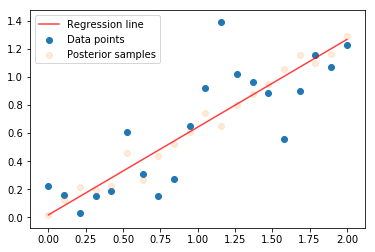

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


# Generate data
M = 20

X = np.linspace(0, 2, num=M)
# X = np.array([5, 14, 19], dtype=np.float)
t_real = np.sin(X)
t = t_real + np.random.randn(M) * 0.25

plt.scatter(X, t, label='Data points')

# Infer p(t|W,X,alpha) = N(t|XW+b,alpha); the predictive distribution
# MLE for W, b, and beta
W_ml = X.T @ t / (X.T @ X)  # Normal eq.
b_ml = np.mean(t) - W_ml * np.mean(X)

y = X * W_ml + b_ml

alpha_ml = np.mean((t - y)**2)

plt.plot(X, y, color='red', alpha=0.75, label='Regression line')

# Sample from predictive dist.
ys = np.random.normal(y, alpha_ml)

plt.scatter(X, ys, alpha=0.15, label='Posterior samples')
plt.legend(loc='best')
plt.show()

# #3 Mixture of 1D LinReg using EM 

(30, 1) (30, 1)
Iter: 0; loglik: -910.4845
W: [-0.00075578 -0.00045267]
Beta: 0.2469081002478943

Iter: 1; loglik: -678.5287
W: [ 0.08553971  0.08386681]
Beta: 0.26124841781513536

Iter: 2; loglik: -677.7670
W: [ 0.08119711  0.08875884]
Beta: 0.2611513165425092

Iter: 3; loglik: -666.1421
W: [ 0.10867119  0.07284028]
Beta: 0.2592037771901762

Iter: 4; loglik: -526.1654
W: [ 0.06889526  0.27724117]
Beta: 0.23840502884904147

Iter: 5; loglik: -684.3599
W: [-0.05969814  0.08481825]
Beta: 0.26111747622165027

Iter: 6; loglik: -604.0932
W: [ 0.16649581  0.08463045]
Beta: 0.26122006460697894

Iter: 7; loglik: -607.3060
W: [ 0.05535956  0.32981791]
Beta: 0.2031318589898431

Iter: 8; loglik: -687.7433
W: [-0.68724087  0.08488236]
Beta: 0.260168894266084

Iter: 9; loglik: -681.2669
W: [-0.71014528  0.08474334]
Beta: 0.2609327763872642

Iter: 10; loglik: -679.3885
W: [-0.71383506  0.08470425]
Beta: 0.26115573245115503

Iter: 11; loglik: -678.8199
W: [-0.71486867  0.08469244]
Beta: 0.261223496956

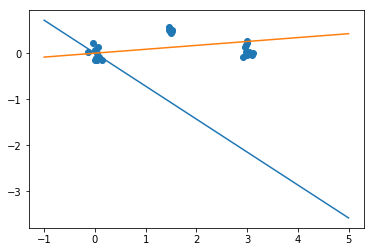

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt


# Generate data
X1 = np.random.multivariate_normal([1.5, 0.5], np.diag([0.001, 0.001]), size=10)
X2 = np.random.multivariate_normal([0, 0], np.diag([0.01, 0.01]), size=10)
X3 = np.random.multivariate_normal([3, 0], np.diag([0.01, 0.01]), size=10)

X = np.vstack([
    X1[:, 0].reshape(-1, 1), X2[:, 0].reshape(-1, 1), X3[:, 0].reshape(-1, 1)
])
y = np.vstack([
    X1[:, 1].reshape(-1, 1), X2[:, 1].reshape(-1, 1), X3[:, 1].reshape(-1, 1)
])

print(X.shape, y.shape)

N = X.shape[0]
K = 2

# Linear regression params
Ws = np.random.randn(2) * 0.001  # 2x1
beta = np.std(y)  # Global stddev
pis = np.ones(2) * 0.5  # Mixing prior

for it in range(50):
    # E-step
    gammas = np.zeros([N, K])

    for k in range(K):
        lik = st.norm.pdf(X, loc=X*Ws[k], scale=beta)
        gammas[:, k] = (pis[k] * lik).ravel()

    # Evaluate
    loglik = np.sum(np.log(np.sum(gammas, axis=1)))
    print('Iter: {}; loglik: {:.4f}'.format(it, loglik))
    print('W: {}'.format(Ws))
    print('Beta: {}'.format(beta))
    print()

    # Normalize gamma
    gammas = gammas / np.sum(gammas, axis=1)[:, np.newaxis]

    # M-step
    for k in range(K):
        N_k = np.sum(gammas[:, k])
        gamma_k = gammas[:, k]

        # Mixing prob for k-th linreg
        pi = N_k / N
        pis[k] = pi

        # New W for linreg
        R = np.diag(gamma_k)
        W = np.linalg.inv(X.T @ R @ X) @ X.T @ R @ y  # Normal eq.
        Ws[k] = W

    # New beta for linreg
    ssq = np.sum(gammas * (y - X*Ws)**2, axis=1)
    beta = np.sqrt(np.mean(ssq))  # Convert to stddev

# Visualize
xx = np.linspace(-1, 5)

plt.scatter(X, y)
plt.plot(xx, xx*Ws[0])
plt.plot(xx, xx*Ws[1])
plt.show()